Exploring the output files generated by the Salish Sea Atlantis Model
to try to reduce PAH build-up in the biopools.

### Test Descriptions & Notes

Test scenarios
1. reduce contam decay timestep to bm -> dt (changed time_step to bm->dt for all contam species decay atContaminants.c line 1077)
1. changed the PAH half_life from being denominated in seconds -> days
1. removed division by time_step atContaminants.c line 1092: bm->contaminantStructure[cIndex]->sp_amount_decayed[sp][cohort] = (cGroupLevel - newValue); (degrate contam in species) [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/fae0e0464112bf59cd496e62a5ff2d44895c1617/notebooks/SSAM-output-biopools.ipynb)
1. removed division by time_step (/dtsz) atContaminants.c line 953: transfer = cGroupLevel * propEaten (contam transfer). [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/0b4862f28e36ef539ce0e7d180a72a7a87ab8e87/notebooks/SSAM-output-biopools.ipynb)
1. change contam_dissolv_coefft 1 in the bio.prm file. [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/3efaad9acdb5929fbf11b8aa737ed40fa30e777a/notebooks/SSAM-output-biopools.ipynb)
1. removed division by time_step (/dtsz) atContaminants.c line 416: amount_decayed = cLevel - newValue (degrade contam in water column) [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/1320cfc3140c669439dbe1ad54ef91d871b4bc3b/notebooks/SSAM-output-biopools.ipynb)
1. Test 6 + removed division by time_step (/dtsz) atContaminants.c line 1100: sp_amount_decayed = cLevel - newValue [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/7459dac1add5bf58396aef32507c89a9c64daa10/notebooks/SSAM-output-biopools.ipynb)
1. Test 4 + Test 6 + removed (* bm->dtsz_stored) from atContaminants.c line 468. Did not add /dtsz in atContaminants.c line 490 because led to -nan flux values. [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/5245e388fe788695751c2b58fbe2055c7e92002c/notebooks/SSAM-output-biopools.ipynb)
1. Test 4 + removed division by time_step atContaminants.c line 1100: sp_amount_decayed [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/093657449acf20da2af9c3f4393fa1aeb57911c8/notebooks/SSAM-output-biopools.ipynb)
1. Test 4 + Test 6 [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/a5bb29598a378f6a70d5000eb0cca481ad7321a9/notebooks/SSAM-output-biopools.ipynb)
1. Test 4 + test 6 repeated with lower bio uptake rates and no zero contam03.nc forcing file [Results](https://github.com/SS-Atlantis/analysis-raisha/blob/ee37bf32732471a5c019b976d1c602f296b85038/notebooks/SSAM-output-biopools.ipynb)
1. Accounting for contam in and out, using [these concentrations](https://github.com/SS-Atlantis/analysis-raisha/blob/5b69b94698c73733f40d842579180321392bd1c8/notebooks/contaminant-dispersal/SSAM-parse-tracks.ipynb) (use_resets = 0 for file 3)
1. same as 12 but use_resets = 1 for file 3
1. atContaminant.c line 470 added division by bm->dtsz_stored to cLevel to make it a rate before subtracting amount_decayed
1. 14 + Added a value of 0.01 to the biology.prm file for dissolv_coefft and removed the interger check in arBiologyXMLParamIO.c line 3779. This affects line 672 in atContaminants.c Gain_Contaminants(), transfer = cGroupLevel * propLost * bm->contaminantStructure[cIndex]->dissolv_coefft / (1 + bm->dtsz_stored); Added the 1+ so that this value is not NaN when bm->dtsz_stored = 0.
1. modified 15 [atContaminants.c] line line 672 transfer = cGroupLevel * propLost * bm->contaminantStructure[cIndex]->dissolv_coefft / (small_num + bm->dtsz_stored); Updated dissolv_coefft to 1 in biology.prm. [Results for v6693](https://github.com/SS-Atlantis/analysis-raisha/blob/644249019a488feeed9704f322bc75cb524e8716/notebooks/SSAM-output-biopools.ipynb), [Results for v6699](https://github.com/SS-Atlantis/analysis-raisha/blob/01fa4f8182a3176038dac57242587f4c8fd542d8/notebooks/SSAM-output-biopools.ipynb)
1. Same as 16 + changed the last 0 contam file to have a small number in place of 0. 
1. atContaminants.c line 1080 in routine Calculate_Species_Contaminant_Decay - change time_step in decay equation to time (time_step = bm->dayt). 
18B - removed division by time_step from bm->contaminantStructure[cIndex]->sp_amount_decayed[sp][cohort] = (cGroupLevel - newValue). 
18D - put time_step back to dt, but in atContaminants.c line 1094, instead of using cLevel in Calculate_Species_Contaminant_Decay, defined cGroupLevel = tracerArray[FunctGroupArray[sp].contaminantTracers[cohort][cIndex]]; and then defined the tracerArray as getTracerArray(boxLayerInfo, habitat) except for EPIFAUNA (getTracerArray(boxLayerInfo, WC))
18F - atContaminants.c line 1094, instead of using cLevel in Calculate_Species_Contaminant_Decay, defined cGroupLevel = tracerArray[FunctGroupArray[sp].contaminantTracers[cohort][cIndex]] as well as changed contaminant decay to use a decay_constant = (log(2))/bm->contaminantStructure[cIndex]->half_life, where newValue now = cGroupLevel * decay_constant * time_step; PROBLEM: newValue should = cGroupLevel when time_step = 0, but with decay_constant equation, newValue = 0 when time_step = 0. test 18D worked to have the contaminants decay at the correct decay_rate for their correspondiong half_life. 
1. The real problem is that death of cells within the biopool for plankton occurs faster than decay via half_life. Contaminants are lost via mortality, but can be regained through concumption of detritus. Commented out 8 instances of Group_Transfer_Contaminant in atGroupProcesses.c that would lead to transfer of contaminants through predation on DL or DR.
1. Commented out Gain_Contaminants in atGroupProcesses.c and atvertprocesses.c to remove transfer of contaminants back to the water column from detritus.



- [comparison of tests 4 & 8](https://github.com/SS-Atlantis/analysis-raisha/blob/d3144b238e7e05e9fe9fcd9ece80a3645e54f30c/notebooks/SSAM-output-biopools.ipynb)
- [tests 10 & 8 identical](https://github.com/SS-Atlantis/analysis-raisha/blob/9ca189d83d4d0ea9bb96ec1d7243cf8138f447ba/notebooks/SSAM-output-biopools.ipynb)

Half lives

| PAH Concentration	|	Naphthalene |	Phenanthrene | Pyrene |	Benzo(a)pyrene |
|-------------------|---------------|-----------------|--------|----------|
| Half life (secs)	|	259200 |	3628800	| 20476800	| 19353600 |
| Half life (days)	|	3	| 42 |	237 |	224 |

### Package and file imports

In [2]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from PIL import Image
import glob
from IPython.display import Image as img
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
control_name = 'control'
test_name = '2019'
test2_name = '2024'
labels = [control_name,test_name,test2_name]
testlabels = [test_name, test2_name]
test1label = [test_name]
test2label = [test2_name]

In [4]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Test_20_discharge_50y_"+ control_name + "/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)

In [5]:
time_c = np.ma.filled(control.variables['t'], np.nan)

In [6]:
test_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Test_20_discharge_50y_" + test_name + "/outputSalishSea.nc"
test2_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber/Test_20_discharge_50y_" + test2_name + "/outputSalishSea.nc"
test = xr.open_dataset(str(test_path), decode_cf=True)
test2= xr.open_dataset(str(test2_path), decode_cf=True)

In [7]:
time1 = np.ma.filled(test.variables['t'], np.nan)
time2 = np.ma.filled(test2.variables['t'], np.nan)

In [8]:
scenarios = [control, test, test2]
tests = [test, test2]
#scen2 = [test2]
scen_labels = [test_name, test2_name]
cont = [control]

### Functions

In [11]:
def plot_pah(scenario, times, label):
    fig, ax = plt.subplots(figsize = (14,3))
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)

        ax.plot(times, contam_mass_t[0:times.size])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(label)

In [12]:
def plot_individual_pah(scenario, times, pah, label):
    fig, ax = plt.subplots(figsize = (14,3))
    contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
    volume_tbl = np.ma.filled(scenario.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)

    ax.plot(times, contam_mass_t[0:times.size])
    ax.legend(pah)
    ax.set_ylabel('mg PAH')
    ax.set_title(label)

In [16]:
def tissue_mass(group, pah, scens, names=labels, time=time1):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scens:

            oil_tbl = np.ma.filled(scenario.variables[group[species] + '_' + pah][:,:,0:6], np.nan) # mgPAH / m3
            volume_tbl = np.ma.filled(scenario.variables['volume'][:,:,0:6], np.nan) #m3
            oil_mass_tbl = oil_tbl * volume_tbl
            oil_mass_tb = oil_mass_tbl.sum(axis=2) 
            oil_mass_t = oil_mass_tb.sum(axis=1) 
            ax.plot(time, oil_mass_t[0:time.size],linewidth = 2, alpha=0.5) #semilogy
        
        #plt.ylabel('mg '+str(pah)+' / mg N ', fontsize=12)
        plt.ylabel('mg '+str(pah)+' inside '+str(species), fontsize=12)
        ax.set_title(species)
    ax.legend(names, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);
    #print(sp_volume_tbl[1,60,:])
    #print(sp_volume_tbl[1,60,:]+(sp_volume_tbl[3,60,:]==0))

In [11]:
def tissue_mass_log(group, pah, scens, names=labels, time=time1):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scens:

            oil_tbl = np.ma.filled(scenario.variables[group[species] + '_' + pah][:,:,0:6], np.nan)
            volume_tbl = np.ma.filled(scenario.variables['volume'][:,:,0:6], np.nan)
            oil_mass_tbl = oil_tbl * (1/(volume_tbl+(volume_tbl==0)))
            oil_mass_tb = oil_mass_tbl.sum(axis=2) 
            oil_mass_t = oil_mass_tb.sum(axis=1) 
            ax.semilogy(time, oil_mass_t[0:time.size],linewidth = 2, alpha=0.5)
        
        plt.ylabel('mg '+str(pah)+' inside '+str(species), fontsize=12)
        ax.set_title(species)
    ax.legend(names, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [22]:
def plot_biomass(group, scens, time, names=labels):
    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scens:
            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][:,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2)
            pelagic_oiled = pelagic_oiled.sum(axis=1)
            ax.plot(time, pelagic_oiled[0:time.size], linewidth = 2)
        
        plt.ylabel('mg N m$^{-3}$', fontsize=12)
        ax.set_title(species)
    ax.legend(names, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [15]:
def map_tissue_mass(group, pah, scenarios, v_max=None, v_min=None, _cmap=cm.Purples):
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    map_df = map_df.set_index('BOX_ID')
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(group), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for species in group:
        for scenario in scenarios:
            dVar_s = scenario.variables[group[species] + '_' + pah][:,:,0:6]
            volume = scenario.variables['volume'][:,:,0:6]
            #dVar_s = dVar_s.sum(axis=2)
            dVar_mass = dVar_s * volume
            vpah_tb = dVar_mass.sum(axis=2)
            vpah_b = vpah_tb.sum(axis=0)

            # Add scenario data to Atlantis spatial data
            map_df['pah'] = vpah_b
            map_df.loc[land_boxes, 'pah'] = 0

            ax = fig.add_subplot(gs[0, position])
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=-0.5) 
            ax = map_df.plot(column = 'pah', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
                legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
                )
            tit = str(species + '_' + pah)
            ax.set_title(tit)
            map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
            land_df.plot(ax=ax, color='white');
        position=position+1

In [16]:
def map_aggregate_time(variable_name, scens, names=labels, v_max=None, v_min=None):

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.Purples
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(scens), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for scenario in scens:
        dVar_s = scenario.variables[variable_name]
        dVar_s = dVar_s.mean(axis=2)
        pah = dVar_s.mean(axis=0)

        # Add scenario data to Atlantis spatial data
        map_df['pah'] = pah
        map_df.loc[land_boxes, 'pah'] = 0

        ax = fig.add_subplot(gs[0, position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'pah', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
            )
        ax.set_title(names[scenario.index], fontsize = 12)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white');
        position = position+1

In [17]:
def map_time_mass(variable_name, scens, time, names=labels, v_max=None, v_min=None):
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    map_df = map_df.set_index('BOX_ID')
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.Purples
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(scens), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for scenario in scens:
        var_bl = scenario.variables[variable_name][time,:,0:6]
        vol_bl = scenario.variables['volume'][time,:,0:6]
        var_mass_bl = var_bl * vol_bl
        var_mass_b = var_mass_bl.mean(axis=1)

        # Add scenario data to Atlantis spatial data
        map_df[variable_name] = var_mass_b
        map_df.loc[land_boxes, variable_name] = 0

        ax = fig.add_subplot(gs[0, position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = variable_name, cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
            )
        ax.set_title(variable_name, fontsize = 12)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white');
        position = position+1
    fig.suptitle(names)

In [18]:
def map_time_depth(variable_name, scens, time, depth, names=labels, v_max=None, v_min=None):

    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    map_df = map_df.set_index('BOX_ID')
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.Purples
    depth_range = ['700 m','400 m', '250 m', '100 m', '50 m', 'surface 25 m', 'sediment']
    
    # map of single variable ratio across the whole simulation

    # Pull variables for all scenarios
    fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
    gs = plt.GridSpec(1, len(scens), wspace=0.5, hspace=0.2, height_ratios=[1],)

    position = 0

    for scenario in scens:
        dVar_s = scenario.variables[variable_name][time,:,depth]
        #dVar_s = dVar_s.mean(axis=1)
        #pah_s = dVar_s.mean(axis=1)
        pah_s = dVar_s

        # Add scenario data to Atlantis spatial data
        map_df['pah'] = pah_s
        map_df.loc[land_boxes, 'pah'] = 0

        ax = fig.add_subplot(gs[0, position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'pah', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
            )
        ax.set_title((variable_name + ' - ' + depth_range[depth] + '_' + str(time)), fontsize = 12)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white');
        position = position+1
        map_df['pah'] = 0

### Water Column

In [ ]:
plot_pah(control, time_c, control_name)

In [ ]:
plot_pah(test, time1, test_name)

In [ ]:
plot_pah(test2, time2, test2_name)

In [2]:
def plot_pah(scenarios, pah, times, label):
    fig, ax = plt.subplots(figsize = (14,3))
    for scenario in scenarios:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)

        ax.plot(times, contam_mass_t[0:times.size])
    ax.legend(label)
    ax.set_ylabel('mg '+ pah)
    ax.set_title(label)

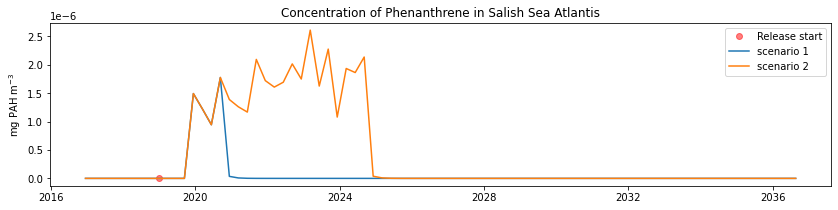

In [19]:
event_start = np.datetime64('2019-01-01')
splot.compare_pah('Phenanthrene', tests, time_c, 40, 120, event_start)

### Plankton

In [ ]:
fig, ax = plt.subplots(figsize = (14,3))
for pah in groups.pahs:
    name = 'PicoPhytopl_' + pah
    contam_tbl = np.ma.filled(test.variables[name], np.nan)
    volume_tbl = np.ma.filled(test.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)

    ax.plot(time1, contam_mass_t[0:time1.size])
ax.legend(groups.pahs)
ax.set_ylabel('mg PAH in Picophytop pool')
ax.set_title(test_name);

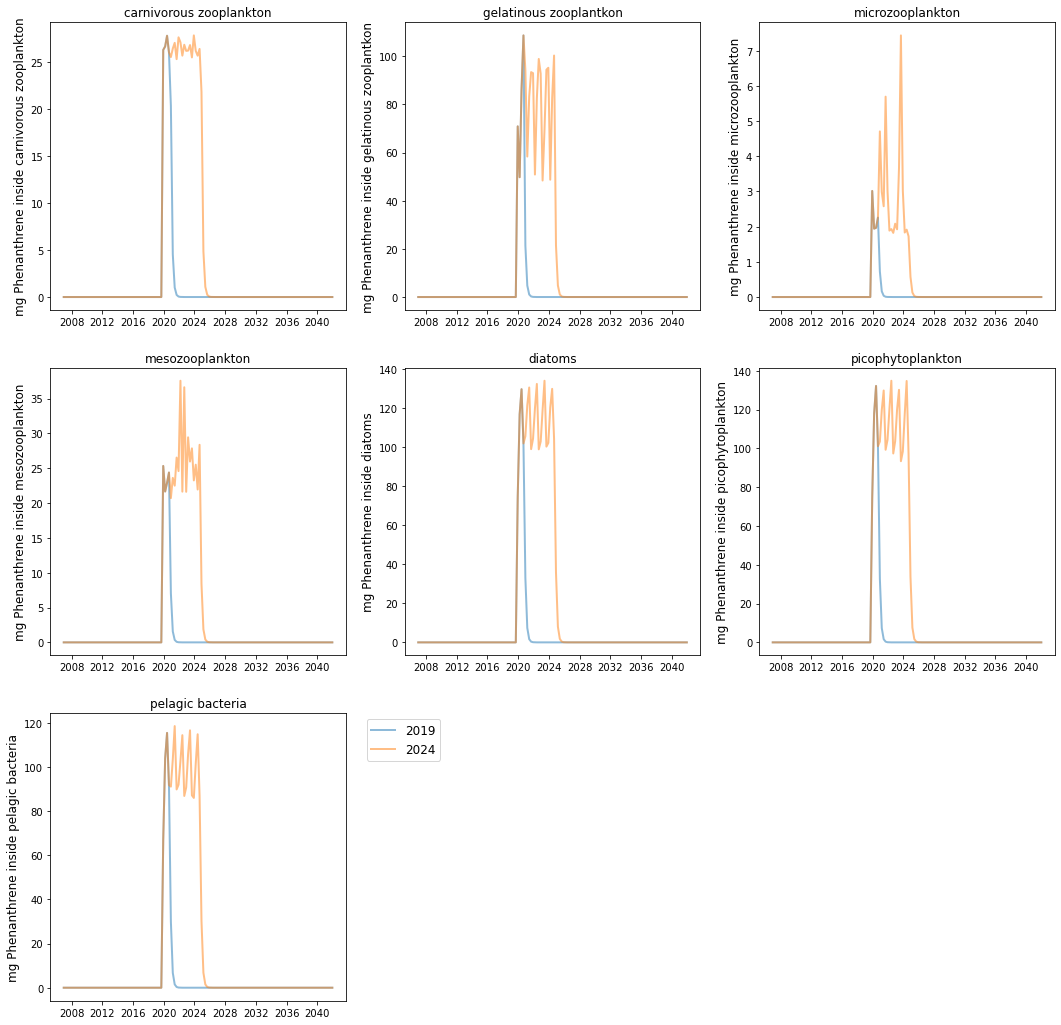

In [23]:
tissue_mass(groups.plankton, 'Phenanthrene', tests, names=testlabels, time=time1)

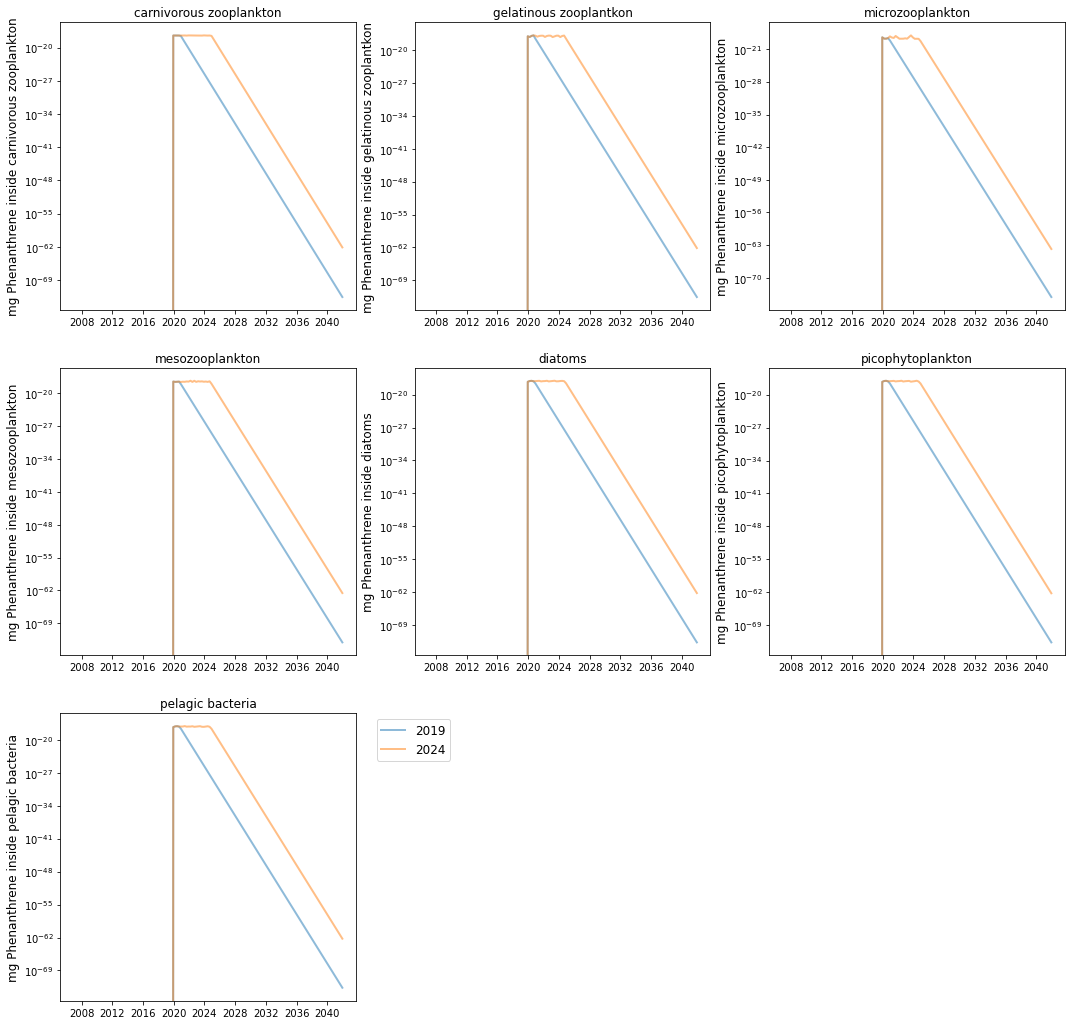

In [24]:
#for pah in groups.pahs:
tissue_mass_log(groups.plankton, 'Phenanthrene', tests, names=testlabels, time=time1)

In [22]:
diatom_naph_tbl = np.ma.filled(test.variables['Diatom_Naphthalene'][:,:,0:6], np.nan)
volume_tbl = np.ma.filled(test.variables['volume'][:,:,0:6], np.nan)
diatom_naph_mass_tbl = diatom_naph_tbl * volume_tbl
diatom_naph_tb = diatom_naph_mass_tbl.sum(axis=2)
diatom_naph_t =  diatom_naph_tb.sum(axis=1)
diatom_naph = diatom_naph_t.sum()
diatom_naph

41145.42805453591

### Invertebrates

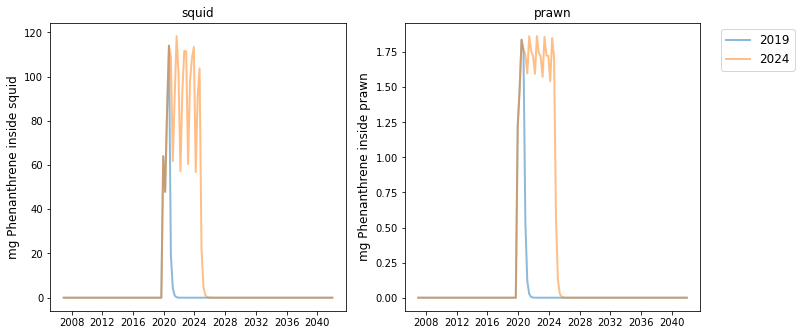

In [25]:
#for pah in groups.pahs:
tissue_mass(groups.pelagic_invertebrates, 'Phenanthrene', tests, names=testlabels, time=time1)

### vertebrates (not biopools, but good to check)

In [49]:
def vertebrate_tissue_mass(group, pah, scenario, time):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])
        
        for cohort in range(1,4):

            sp_oil_tbl = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_' + pah][:,:,0:6], np.nan) # mgPAH/m3
            vol_tbl = np.ma.filled(scenario.variables['volume'][:,:,0:6], np.nan) # m3
            nums = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_Nums'][:,:,0:6], np.nan)
            oil_mass_tbl = (sp_oil_tbl * vol_tbl) #* (1/(nums+(nums==0))) # mg PAH / individual
            oil_mass_tb = oil_mass_tbl.mean(axis=2) #averaged over the water column
            oil_mass_t = oil_mass_tb.mean(axis=1) #averaged across boxes
            ax.plot(time, oil_mass_t,linewidth = 2) #semilogy
        
        #plt.ylabel('mg '+str(pah)+' / mg N '+str(species), fontsize=12)
        plt.ylabel('mg '+str(pah)+' in '+str(species), fontsize=12)
        ax.set_title(str(species))
    ax.legend(['cohort 1','cohort 2', 'cohort 3'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [40]:
def vertebrate_tissue_mass_log(group, pah, scenario, time):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])
        
        for cohort in range(1,4):

            sp_oil_tbl = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_' + pah][:,:,0:6], np.nan) # mgPAH/m3
            vol_tbl = np.ma.filled(scenario.variables['volume'][:,:,0:6], np.nan) # m3
            nums = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_Nums'][:,:,0:6], np.nan)
            oil_mass_tbl = (sp_oil_tbl * vol_tbl) * (1/(nums+(nums==0))) # mg PAH / individual
            oil_mass_tb = oil_mass_tbl.mean(axis=2) #averaged over the water column
            oil_mass_t = oil_mass_tb.mean(axis=1) #averaged across boxes
            ax.semilogy(time, oil_mass_t,linewidth = 2)
        
        #plt.ylabel('mg '+str(pah)+' / mg N '+str(species), fontsize=12)
        plt.ylabel('mg '+str(pah)+' per '+str(species), fontsize=12)
        ax.set_title(str(species))
    ax.legend(['cohort 1','cohort 2', 'cohort 3'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

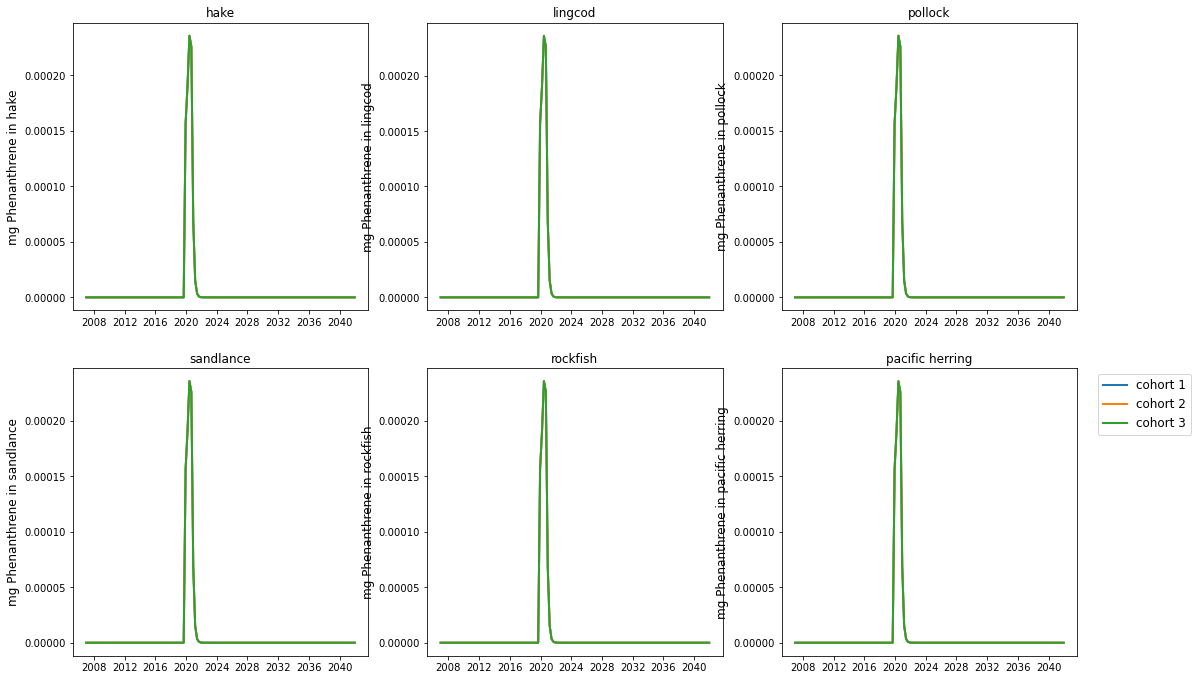

In [50]:
vertebrate_tissue_mass(groups.named_fish, 'Phenanthrene', test, time=time1)

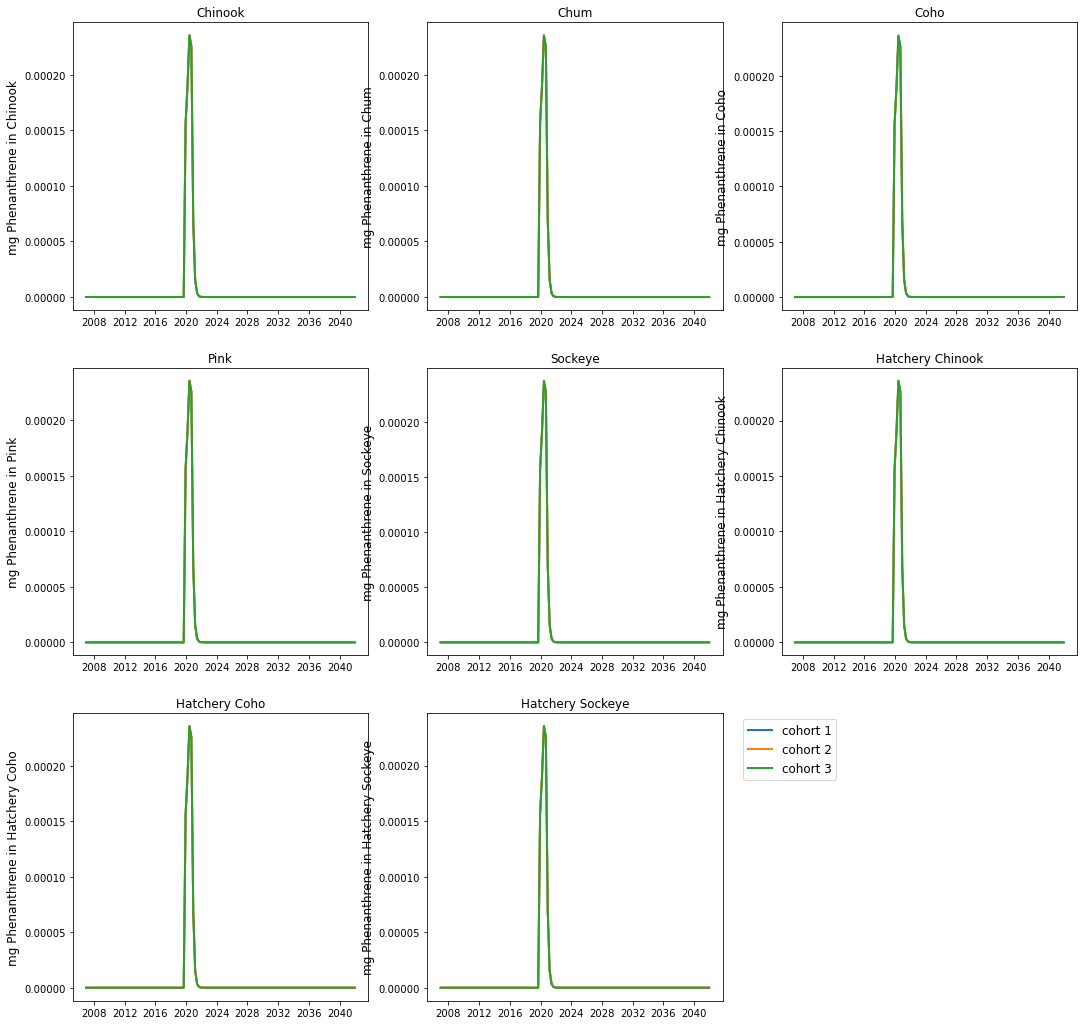

In [51]:
vertebrate_tissue_mass(groups.salmon, 'Phenanthrene', test, time=time1)

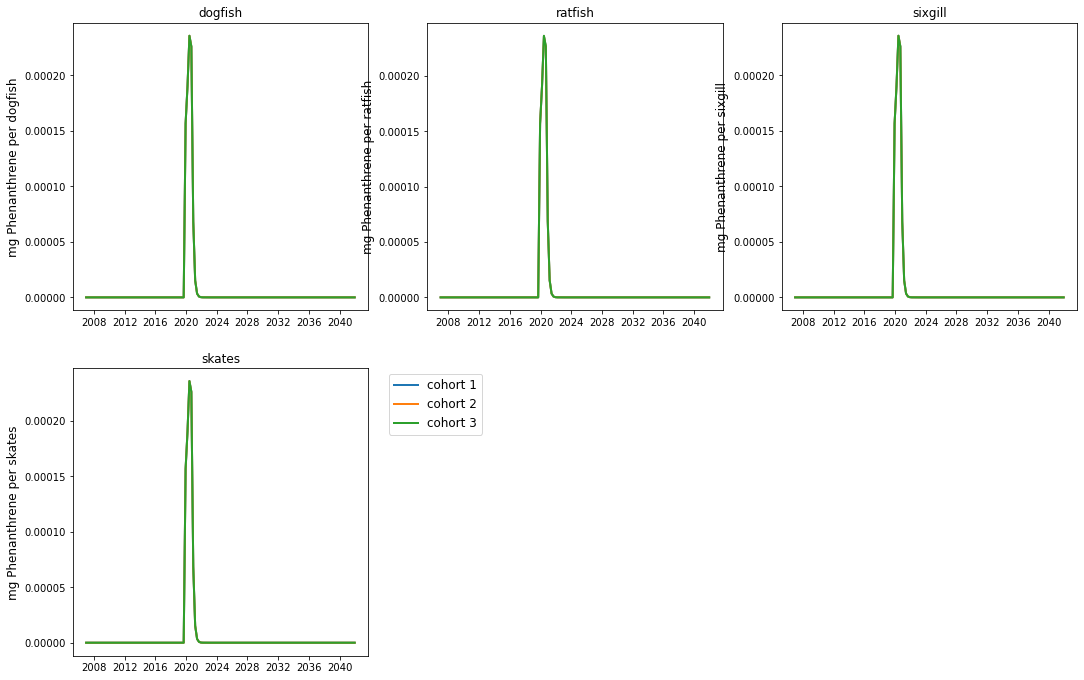

In [48]:
vertebrate_tissue_mass(groups.sharks, 'Phenanthrene', test, time=time1)

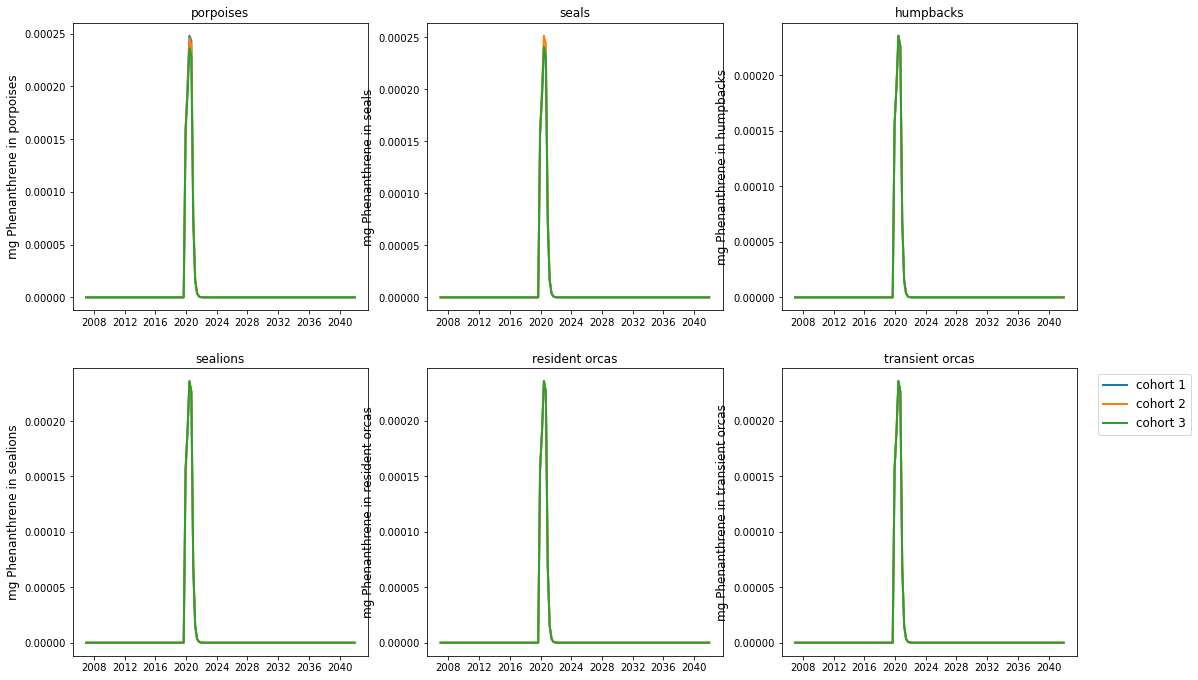

In [52]:
vertebrate_tissue_mass(groups.mammals, 'Phenanthrene', test, time=time1)

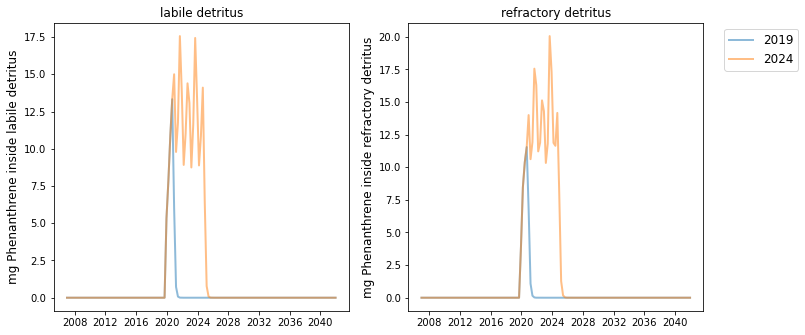

In [12]:
tissue_mass(groups.detritus, 'Phenanthrene', tests, names=testlabels, time=time1)

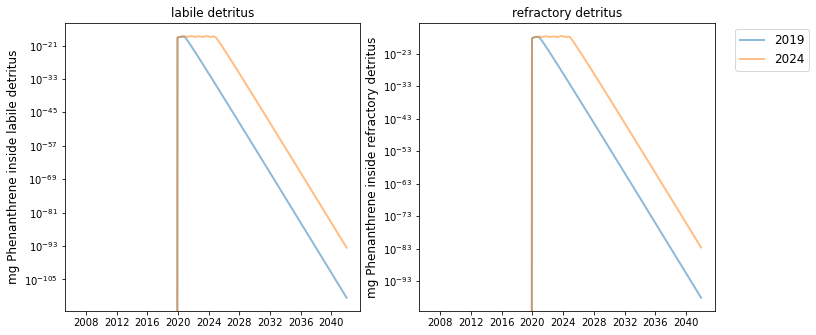

In [13]:
tissue_mass_log(groups.detritus, 'Phenanthrene', tests, names=testlabels, time=time1)

In [13]:
def tissue_mass_with_sedimnent(group, pah, scens, names=labels, time=time1):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for scenario in scens:

            oil_tbl = np.ma.filled(scenario.variables[group[species] + '_' + pah][:,:,:], np.nan) # mgPAH / m3
            volume_tbl = np.ma.filled(scenario.variables['volume'][:,:,:], np.nan) #m3
            oil_mass_tbl = oil_tbl * volume_tbl
            oil_mass_tb = oil_mass_tbl.sum(axis=2) 
            oil_mass_t = oil_mass_tb.sum(axis=1) 
            ax.plot(time, oil_mass_t[0:time.size],linewidth = 2, alpha=0.5) #semilogy
        
        #plt.ylabel('mg '+str(pah)+' / mg N ', fontsize=12)
        plt.ylabel('mg '+str(pah)+' inside '+str(species), fontsize=12)
        ax.set_title(species)
    ax.legend(names, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);
    #print(sp_volume_tbl[1,60,:])
    #print(sp_volume_tbl[1,60,:]+(sp_volume_tbl[3,60,:]==0))

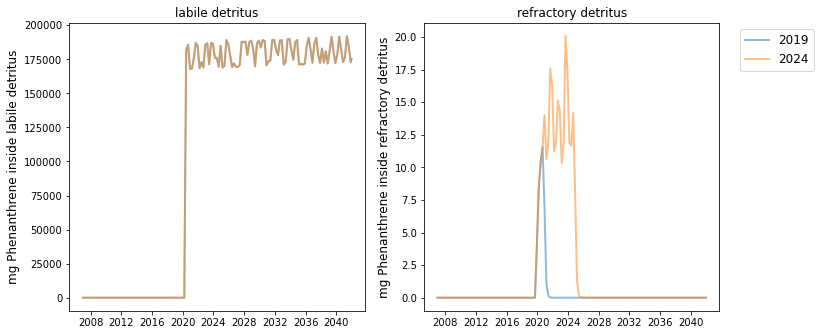

In [15]:
tissue_mass_with_sediment(groups.detritus, 'Phenanthrene', tests, names=testlabels, time=time1)